In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [99]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('absatweets.csv', header = 0, error_bad_lines=False)
data = df[["id","extract","sentiment"]]
df.head(100)

b'Skipping line 11798: expected 41 fields, saw 48\nSkipping line 12162: expected 41 fields, saw 48\nSkipping line 12235: expected 41 fields, saw 48\nSkipping line 13081: expected 41 fields, saw 48\nSkipping line 13853: expected 41 fields, saw 48\nSkipping line 14590: expected 41 fields, saw 48\nSkipping line 15519: expected 41 fields, saw 48\nSkipping line 15564: expected 41 fields, saw 48\nSkipping line 15622: expected 41 fields, saw 48\n'
b'Skipping line 16925: expected 41 fields, saw 48\nSkipping line 17897: expected 41 fields, saw 48\nSkipping line 18648: expected 41 fields, saw 48\nSkipping line 19129: expected 41 fields, saw 48\nSkipping line 20124: expected 41 fields, saw 48\nSkipping line 20334: expected 41 fields, saw 48\nSkipping line 20718: expected 41 fields, saw 48\nSkipping line 21059: expected 41 fields, saw 48\nSkipping line 21226: expected 41 fields, saw 48\nSkipping line 21858: expected 41 fields, saw 48\nSkipping line 22057: expected 41 fields, saw 48\nSkipping line 

,id,uri,link,title,extract,published,visibility.label,authorId,authorName,authorHandle,authorHandleId,authorPictureLink,authorProfileLink,authorBio,authorLocation,authorTimezone,replyToUri,replyToId,reshareOfUri,reshareOfId,toId,toName,toHandle,toHandleId,postExtract,relevancy,relevancyVerified,sentiment,sentimentVerified,crowdVerified,pickedUp,city.name,region.name,country.name,language.name,category.label,gender.label,race.label,engagement,OTS,tags
0,150335-1738949,http://twitter.com/x/status/1267213112358383618,http://twitter.com/WestoverAllan/statuses/1267...,NaN,Scary !,2020-05-31 23:55:24,NaN,Tx1190593437093023744,Allan Westover,WestoverAllan,1.190593e+18,https://piccache.brandseye.com/api/https%3A%2F...,https://twitter.com/WestoverAllan,husband father sports lover love travel,NaN,NaN,http://twitter.com/x/status/1267051787556728832,150335-1738334,NaN,NaN,Tx895245463,Karin Richards,Richards_Karin,8.952455e+08,Absa expects South Africa's real GDP to fall b...,RELEVANT,True,0,True,True,2020-05-31 23:55:34,NaN,NaN,NaN,English,Consumer,Male,NaN,NaN,7.0,segment:Non-CX post tag:Twitter tag:Overall co...
1,150335-1738890,http://twitter.com/x/status/1267212607519371267,http://twitter.com/LKMamabolo/statuses/1267212...,NaN,@master_nzama @AbsaSouthAfrica 😡,2020-05-31 23:53:23,NaN,Tx3299075398,Khutso M ,LKMamabolo,3.299075e+09,https://piccache.brandseye.com/api/https%3A%2F...,https://twitter.com/LKMamabolo,👨🏾‍🦲I’m an African 🌍🇿🇦,South Africa,NaN,http://twitter.com/x/status/1267120907761352705,NaN,NaN,NaN,Tx2335903797,Doctor🔥🇿🇼🇿🇦🇳🇬💉,master_nzama,2.335904e+09,NaN,RELEVANT,NaN,-1,NaN,False,2020-05-31 23:53:34,NaN,NaN,South Africa,NaN,Consumer,NaN,NaN,NaN,1751.0,tag:Engage - received tag:Engage - ticketed ta...
2,150335-1738889,http://twitter.com/x/status/1267212001819975680,http://twitter.com/HarrisMolefi/statuses/12672...,NaN,RT @Richards_Karin: Absa expects South Africa'...,2020-05-31 23:50:59,NaN,Tx1324324538,Harry,HarrisMolefi,1.324325e+09,https://piccache.brandseye.com/api/https%3A%2F...,https://twitter.com/HarrisMolefi,Agricultural Economics & Risk Management gradu...,"North West,Potchefstroom",NaN,NaN,NaN,http://twitter.com/x/status/1267051787556728832,150335-1738334,Tx895245463,Karin Richards,Richards_Karin,8.952455e+08,NaN,RELEVANT,True,0,True,True,2020-05-31 23:51:09,Potchefstroom,North-West,South Africa,English,Consumer,Male,NaN,NaN,363.0,crowd:duplicate segment:Non-conduct reshare ta...
3,150335-1738888,http://twitter.com/x/status/1267211122727403531,http://twitter.com/x/status/1267211122727403531,NaN,(this mention has been deleted),2020-05-31 23:47:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/x/status/1267051787556728832,150335-1738334,NaN,NaN,NaN,NaN,NaN,IRRELEVANT,NaN,0,NaN,True,2020-05-31 23:47:40,Johannesburg,Gauteng,South Africa,English,Consumer,NaN,NaN,NaN,NaN,crowd:duplicate segment:Non-conduct reshare ta...
4,150335-1738948,http://twitter.com/x/status/1267209762556575744,http://twitter.com/me_shell33/statuses/1267209...,NaN,RT @Richards_Karin: Absa expects South Africa'...,2020-05-31 23:42:05,NaN,Tx26476112,Scouse-African,me_shell33,2.647611e+07,https://piccache.brandseye.com/api/https%3A%2F...,https://twitter.com/me_shell33,nutjob | \ndemotivational speaker | \nsouth af...,NaN,NaN,NaN,NaN,http://twitter.com/x/status/1267051787556728832,150335-1738334,Tx895245463,Karin Richards,Richards_Karin,8.952455e+08,NaN,RELEVANT,True,0,True,True,2020-05-31 23:42:15,NaN,NaN,NaN,English,Consumer,NaN,NaN,NaN,396.0,crowd:duplicate segment:Non-conduct reshare ta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,150335-1738822,http://twitter.com/x/status/1267167406805450756,http://twitter.com/taka_mabhabha/statuses/1267...,NaN,RT @Alex_Lwandle: Orlando Pirates would be cel...,2020-05-31 20:53:47,NaN,Tx1263426507881545728,UMXHOSA🖤,taka_mabhabha,1.263427e+18,https://piccache.brandseye.c

In [100]:
data

,id,extract,sentiment
0,150335-1738949,Scary !,0
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0
3,150335-1738888,(this mention has been deleted),0
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0
...,...,...,...
66259,150335-1554305,@tysonbmhlongo @kabelodick @AdvoBarryRoux @FNB...,-1
66260,150335-1554304,@JasonNoah_ Absa\n9357602960,0
66261,150335-1554217,RT @SuperiorZulu: The PIC which is State Owned...,0
66262,150335-1554216,RT @SuperiorZulu: The PIC which is State Owned...,0


In [101]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
data.head()

,id,extract,sentiment
0,150335-1738949,Scary !,0
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0
3,150335-1738888,(this mention has been deleted),0
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0


In [102]:
# remove twitter handles (@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['extract'], "@[\w]*")
data.head()

,id,extract,sentiment,clean_tweet
0,150335-1738949,Scary !,0,Scary !
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1,😡
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,RT : Absa expects South Africa's real GDP to f...
3,150335-1738888,(this mention has been deleted),0,(this mention has been deleted)
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,RT : Absa expects South Africa's real GDP to f...


In [103]:
# remove special characters, numbers and punctuations
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,id,extract,sentiment,clean_tweet
0,150335-1738949,Scary !,0,Scary
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1,
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,RT Absa expects South Africa s real GDP to f...
3,150335-1738888,(this mention has been deleted),0,this mention has been deleted
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,RT Absa expects South Africa s real GDP to f...


In [105]:
# remove short words
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,id,extract,sentiment,clean_tweet
0,150335-1738949,Scary !,0,Scary
1,150335-1738890,@master_nzama @AbsaSouthAfrica 😡,-1,
2,150335-1738889,RT @Richards_Karin: Absa expects South Africa'...,0,Absa expects South Africa real fall Nine point...
3,150335-1738888,(this mention has been deleted),0,this mention been deleted
4,150335-1738948,RT @Richards_Karin: Absa expects South Africa'...,0,Absa expects South Africa real fall Nine point...


In [106]:
# individual words considered as tokens
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                              [Scary]
1                                                   []
2    [Absa, expects, South, Africa, real, fall, Nin...
3                       [this, mention, been, deleted]
4    [Absa, expects, South, Africa, real, fall, Nin...
Name: clean_tweet, dtype: object

In [3]:
!pip3 install wordcloud

You should consider upgrading via the 'C:\Users\Refentse\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


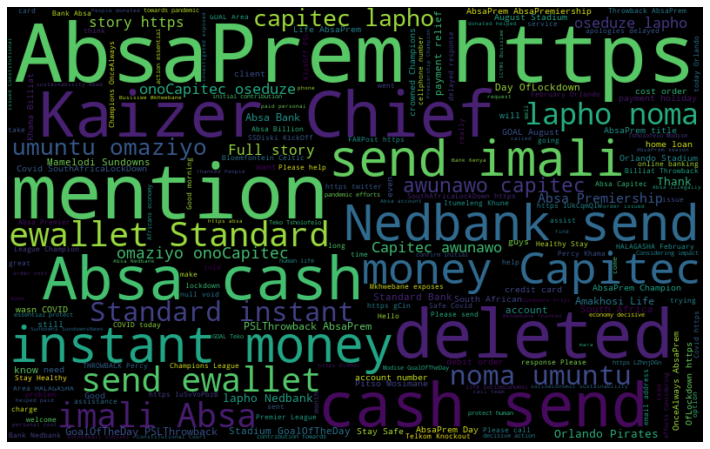

In [108]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in data['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [109]:
data[data['sentiment'] == 1].count()

id             4750
extract        4750
sentiment      4750
clean_tweet    4750
dtype: int64

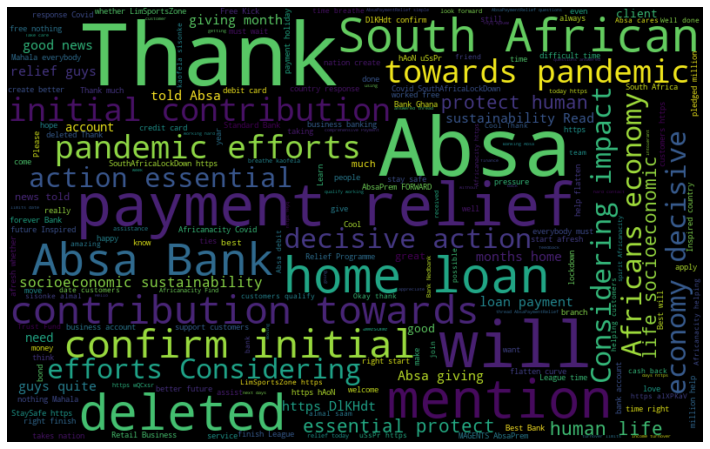

In [110]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in data['clean_tweet'][data['sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [111]:
data[data['sentiment'] == 0].count()

id             49132
extract        49132
sentiment      49132
clean_tweet    49132
dtype: int64

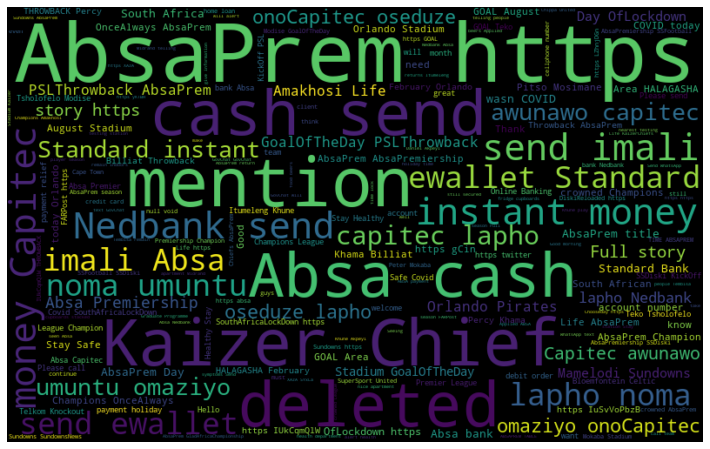

In [112]:
# frequent words visualization for neutral
all_words = " ".join([sentence for sentence in data['clean_tweet'][data['sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [113]:
data[data['sentiment'] == -1].count()

id             12382
extract        12382
sentiment      12382
clean_tweet    12382
dtype: int64

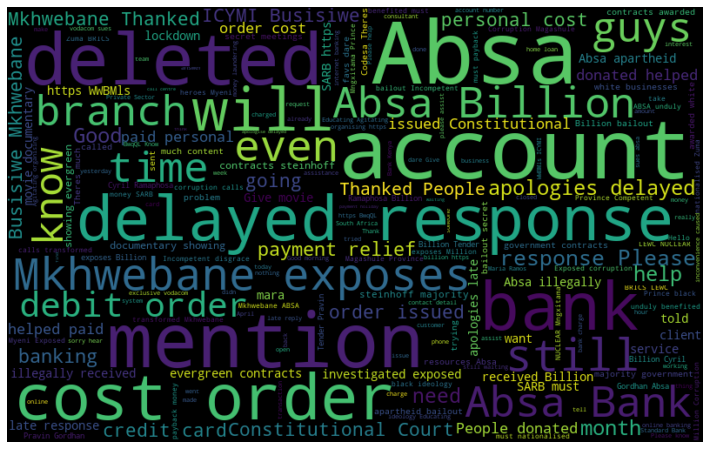

In [114]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in data['clean_tweet'][data['sentiment']==-1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [120]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [121]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(data['clean_tweet'][data['sentiment']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(data['clean_tweet'][data['sentiment']==-1])

# extract hashtags from neutral tweets
ht_neutral = hashtag_extract(data['clean_tweet'][data['sentiment']==1])

In [122]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_neutral = sum(ht_neutral, [])

In [123]:
ht_positive[:5]

['agotamiento', 'trabajarencaso', 'vivamejor', 'cambiatuvida', 'robertoaceves']

In [124]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Word': list(freq.keys()),
                 'Count': list(freq.values())})
d.head(100)

,Word,Count
0,agotamiento,1
1,trabajarencaso,1
2,vivamejor,1
3,cambiatuvida,2
4,robertoaceves,1
...,...,...
95,katlego,4
96,tebogo,10
97,mbali,6
98,southafricanboerboel,1


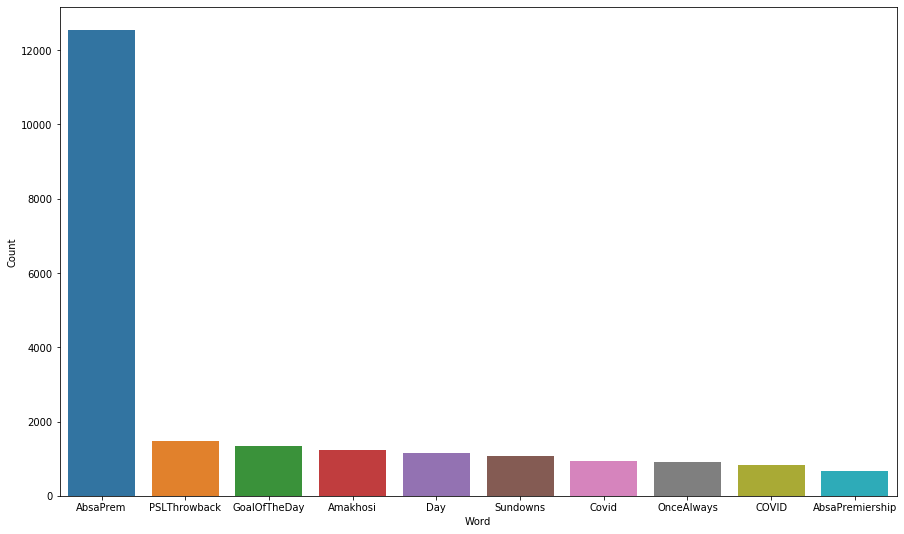

In [125]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Word', y='Count')
plt.show()

In [126]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Word': list(freq.keys()),
                 'Count': list(freq.values())})
d.head(100)

,Word,Count
0,PutSouthAfricansFirst,4
1,Absa,21
2,Barclays,2
3,PutSouthAfricansFirstNow,1
4,DontbankwithAbsadontbank,7
...,...,...
95,day,10
96,coronavirus,3
97,ABSAbank,1
98,badservice,2


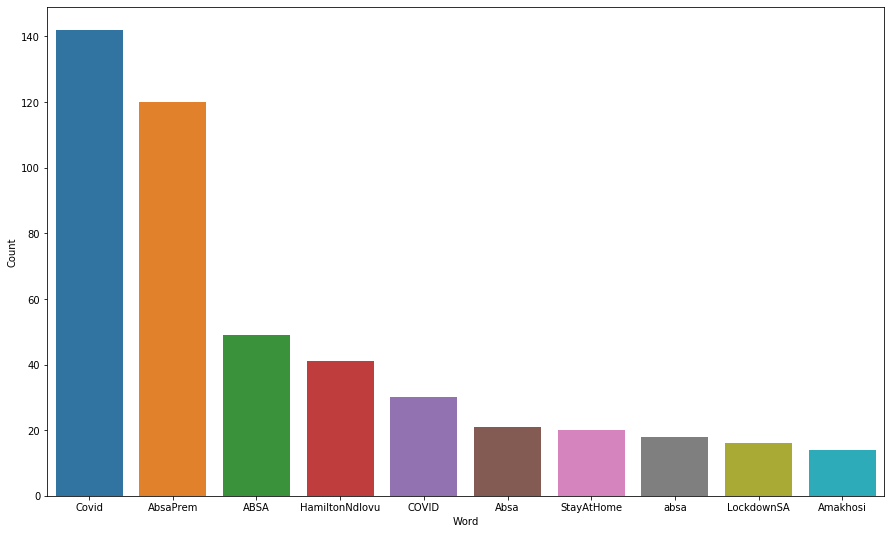

In [127]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Word', y='Count')
plt.show()

In [128]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['clean_tweet'])

In [129]:
# bow[0].toarray()

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, data['sentiment'], random_state=42, test_size=0.25)

In [131]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [132]:
# training
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [133]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred, average = None)

array([0.58680406, 0.83655326, 0.42706439])

In [134]:
accuracy_score(y_test,pred)

0.7499094530967041

In [138]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, -1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred, average =None)

array([0.        , 0.83651236, 0.42048346])

In [136]:
accuracy_score(y_test,pred)

0.7189424121695038

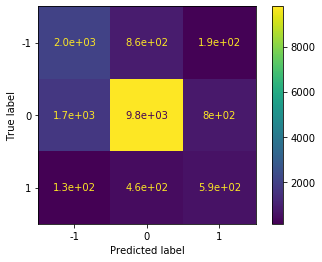

In [137]:
plot_confusion_matrix(model, x_test, y_test) 